In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
import sys

file_path = "https://raw.githubusercontent.com/FarzinSohraby/PathInHydro/refs/heads/main/"

%matplotlib inline

In [2]:
# Define categories
categories = ['T1', 'T2', 'T3', 'T4', 'T5', 'T6', 'T7', 'T8', 'T9', 'T10']

# Define colors for each category
color_palette = ['#1F77B4', '#bcbd22', '#D62728', '#9467BD', '#7F7F7F', '#E377C2', '#17BECF', '#FF7F0E', '#8C564B', '#000000']
# Define a custom color palette
mc_colors = dict(zip(categories, color_palette))

# Set up the plotting environment
sns.set_style("ticks")
plt.rcParams.update({'font.size': 18})  # Update the font size globally

In [3]:
# Load and preprocess the main data set (Df-H2ase-CO)
data = pd.read_csv(file_path+'Df_H2ase_CO_H2.csv')
# Add a 'Molecule' column based on the 'Trajectory' column to distinguish between CO and H2
data['Molecule'] = data['Trajectory'].apply(lambda x: 'H2' if 'H2' in x else 'CO')

data = data.drop(["Trajectory", "Frame", "Binary"], axis=1)

X = data.drop(['Pathway-new', "Molecule"], axis=1)  # Features
y = data['Pathway-new']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=data['Molecule'])


# Load and preprocess the O2 dataset
data_O2 = pd.read_csv(file_path+'Df_H2ase_O2.csv')
y_O2 = data_O2['Pathway-new']

# Load and preprocess the Mdg_CO dataset
data_Mdg_CO = pd.read_csv(file_path+'Mdg_H2ase_CO.csv')
y_Mdg_CO = data_Mdg_CO['Pathway-new']

# Load and preprocess the Mdg_H2 dataset
data_Mdg_H2 = pd.read_csv(file_path+'Mdg_H2ase_H2.csv')
y_Mdg_H2 = data_Mdg_H2['Pathway-new']

# Load and preprocess the Mdg_O2 dataset
data_Mdg_O2 = pd.read_csv(file_path+'Mdg_H2ase_O2.csv')
y_Mdg_O2 = data_Mdg_O2['Pathway-new']

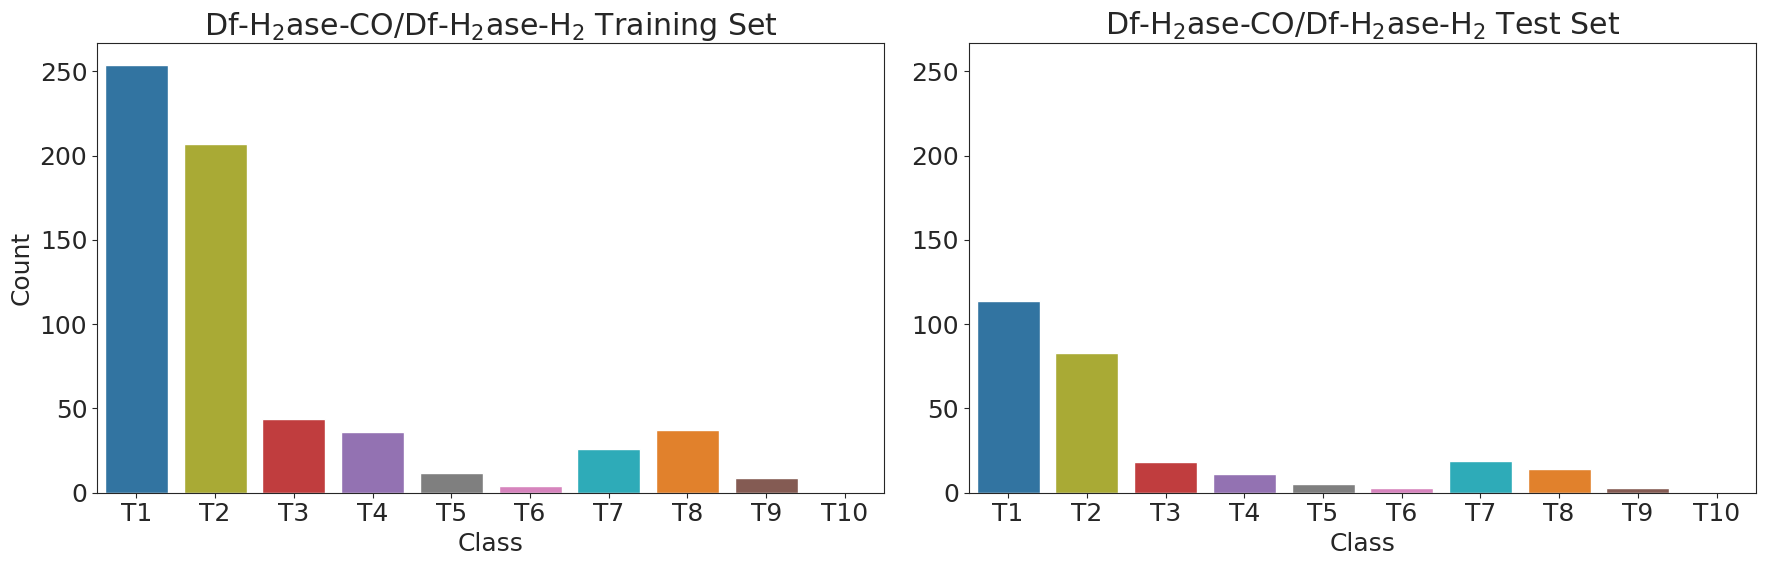

In [4]:
fig_mc_DfCO, axes = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(18,6))

sns.countplot(x=y_train, hue=y_train, order=categories, palette=mc_colors,
              legend=False, ax=axes[0])
axes[0].set_title('Df-H$_2$ase-CO/Df-H$_2$ase-H$_2$ Training Set')
sns.countplot(x=y_test, hue=y_test, order=categories, palette=mc_colors,
              legend=False, ax=axes[1])
axes[1].set_title('Df-H$_2$ase-CO/Df-H$_2$ase-H$_2$ Test Set')

for i in range(2):
    axes[i].set_xlabel('Class')
    axes[i].set_ylabel('Count')
    axes[i].yaxis.set_tick_params(labelbottom=True)

plt.tight_layout()
#plt.savefig(file_path+'Distribution-DF-Train-Sets.png', dpi=300, bbox_inches='tight')
plt.show()

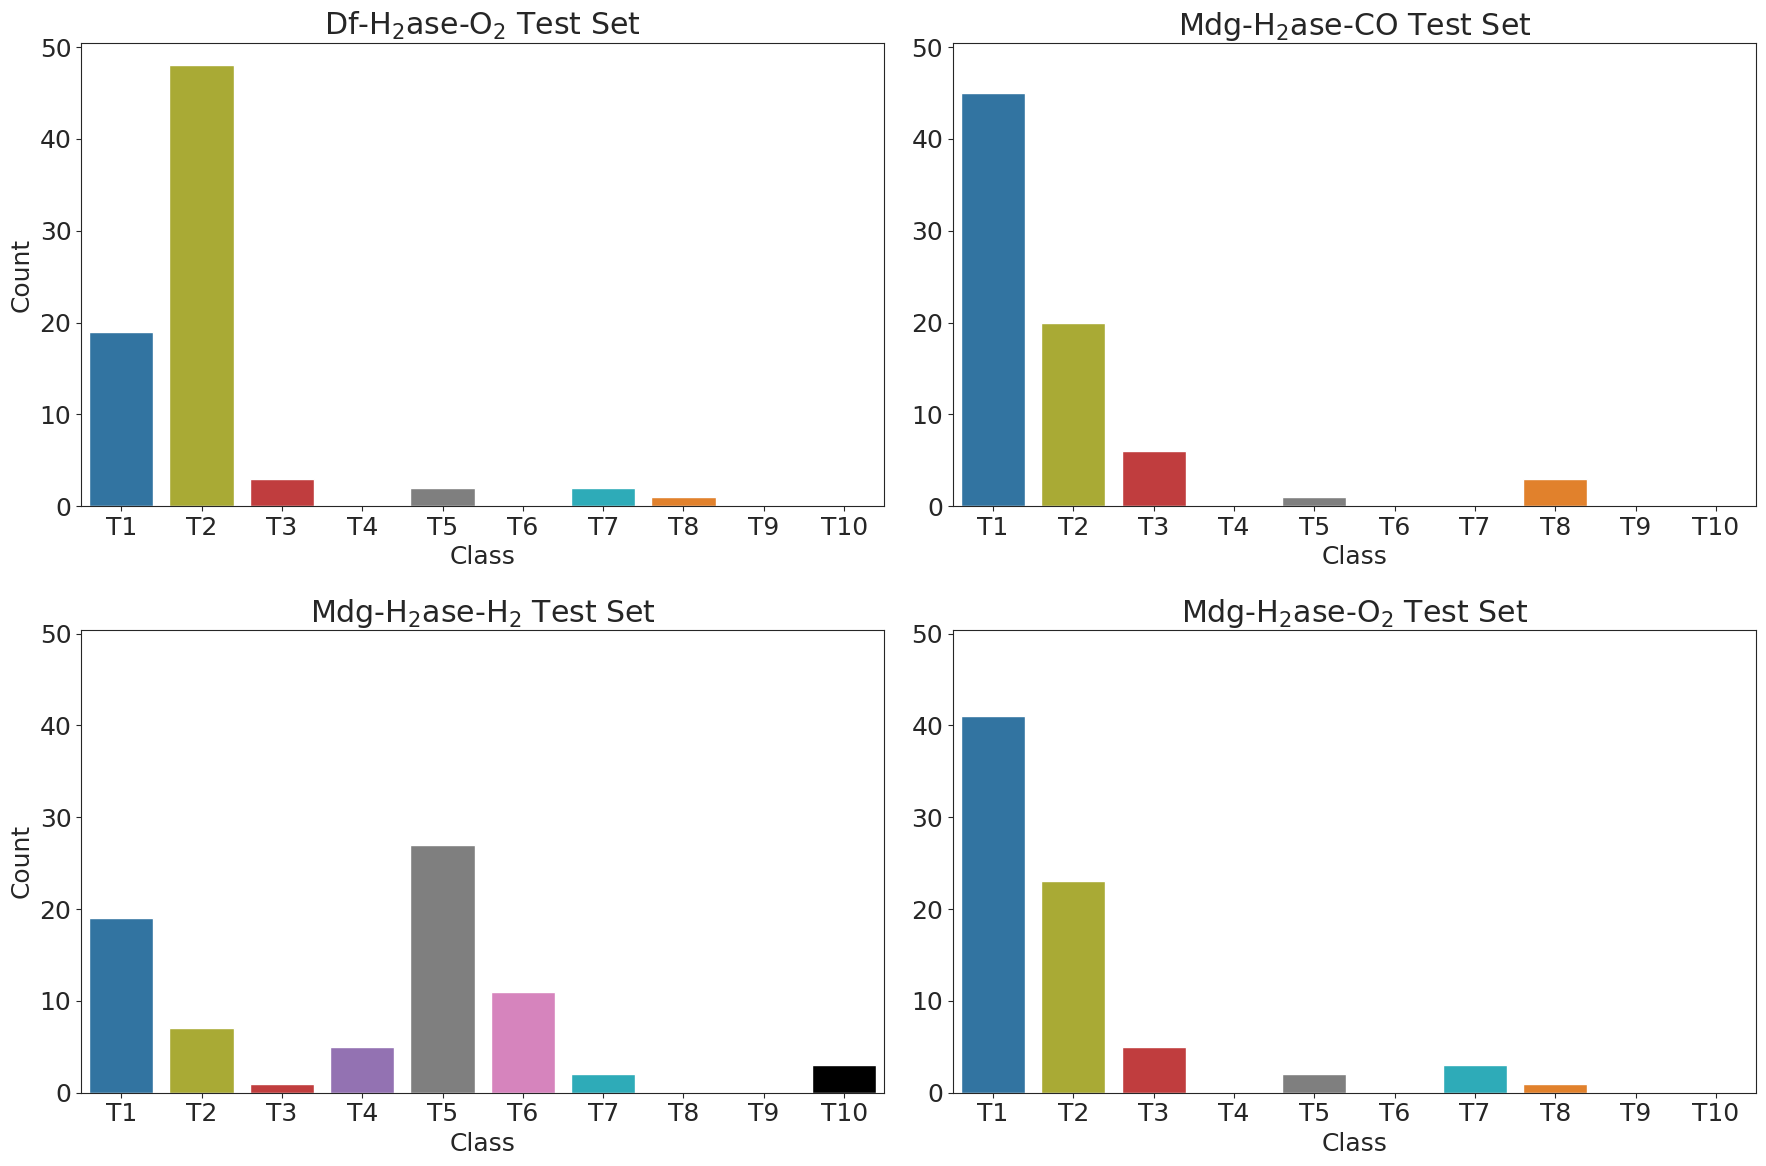

In [ ]:
fig_mc_other, axes = plt.subplots(nrows=2, ncols=2, sharey=True, figsize=(18,12))

# Accessing individual subplots using correct indexing
sns.countplot(x=y_O2, hue=y_O2, order=categories, palette=mc_colors,
              legend=False, ax=axes[0, 1])
axes[0, 0].set_title('Df-H$_2$ase-O$_2$ Test Set')

sns.countplot(x=y_Mdg_CO, hue=y_Mdg_CO, order=categories, palette=mc_colors,
              legend=False, ax=axes[0, 0])
axes[0, 1].set_title('Mdg-H$_2$ase-CO Test Set')
sns.countplot(x=y_Mdg_H2, hue=y_Mdg_H2, order=categories, palette=mc_colors,
              legend=False, ax=axes[1, 0])
axes[1, 0].set_title('Mdg-H$_2$ase-H$_2$ Test Set')
sns.countplot(x=y_Mdg_O2, hue=y_Mdg_O2, order=categories, palette=mc_colors,
              legend=False, ax=axes[1, 1])
axes[1, 1].set_title('Mdg-H$_2$ase-O$_2$ Test Set')


for i in range(2):
    for j in range(2):
        axes[i, j].set_xlabel('Class')
        axes[i, j].set_ylabel('Count')
        axes[i, j].yaxis.set_tick_params(labelbottom=True)

plt.tight_layout()
#plt.savefig(file_path+'Distribution-DF-Test-Sets.png', dpi=300, bbox_inches='tight')
plt.show()

  Class  Df-H2ase-CO/H2-train  Df-H2ase-CO/H2-test  Df-H2ase-O2  Mdg-H2ase-CO  \
0    T1                   254                  114           45            19   
1    T2                   207                   83           20            48   
2    T3                    44                   18            6             3   
3    T4                    36                   11            0             0   
4    T5                    12                    5            1             2   
5    T6                     4                    3            0             0   
6    T7                    26                   19            0             2   
7    T8                    37                   14            3             1   
8    T9                     9                    3            0             0   
9   T10                     0                    0            0             0   

   Mdg-H2ase-H2  Mdg-H2ase-O2  
0            19            41  
1             7            23  
2           

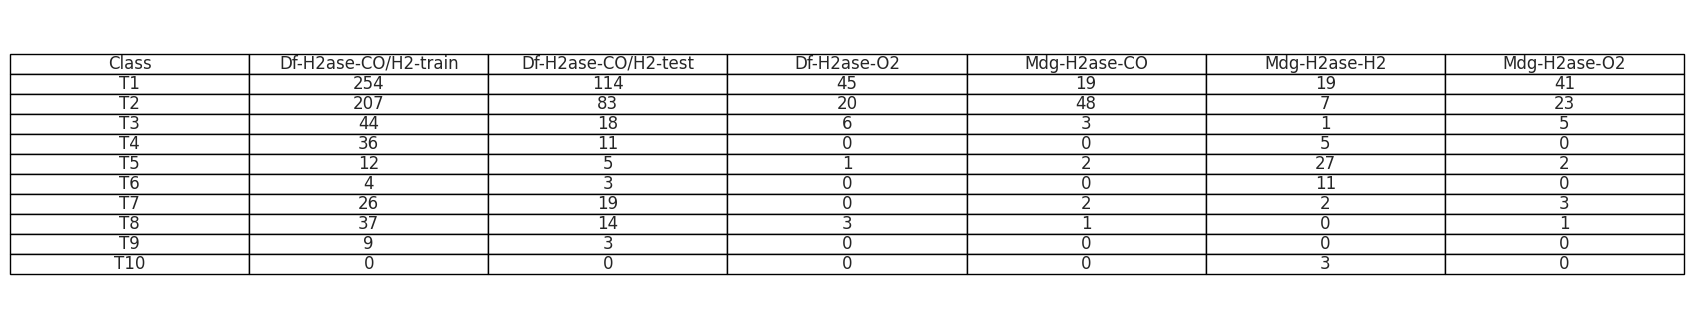

In [ ]:
# Calculate the class distributions
#dist_H2 = y_H2.value_counts().reindex(categories, fill_value=0).sort_index()
dist_O2 = y_O2.value_counts().reindex(categories, fill_value=0)
dist_Mdg_CO = y_Mdg_CO.value_counts().reindex(categories, fill_value=0)
dist_Mdg_H2 = y_Mdg_H2.value_counts().reindex(categories, fill_value=0)
dist_Mdg_O2 = y_Mdg_O2.value_counts().reindex(categories, fill_value=0)
dist_train = y_train.value_counts().reindex(categories, fill_value=0)
dist_test = y_test.value_counts().reindex(categories, fill_value=0)

# Combine these distributions into a single DataFrame
distribution_df = pd.DataFrame({
    'Class': categories,
    'Df-H2ase-CO/H2-train': dist_train.values,
    'Df-H2ase-CO/H2-test': dist_test.values,
    #'Df-H2ase-H2': dist_H2.values,
    'Df-H2ase-O2': dist_O2.values,
    'Mdg-H2ase-CO': dist_Mdg_CO.values,
    'Mdg-H2ase-H2': dist_Mdg_H2.values,
    'Mdg-H2ase-O2': dist_Mdg_O2.values,
})

# Display the DataFrame as a table
print(distribution_df)

# If you want to display the table as an image
plt.figure(figsize=(18, 4))
plt.axis('off')
table = plt.table(cellText=distribution_df.values, colLabels=distribution_df.columns, cellLoc='center', loc='center')
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.2, 1.2)
plt.show()